ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Скачать данные

Описание столбцов:

1. work_year	Год, в котором была выплачена зарплата.
2. experience_level	Опыт работы на этой должности в течение года со следующими возможными значениями:
-  EN — Entry-level/Junior;
-  MI — Mid-level/Intermediate;
-  SE — Senior-level/Expert;
-  EX — Executive-level/Director.
3. employment_type	Тип трудоустройства для этой роли:
- PT — неполный рабочий день;
- FT — полный рабочий день;
- CT — контракт;
- FL — фриланс.
4. job_title	Роль, в которой соискатель работал в течение года.
5. salary	Общая выплаченная валовая сумма заработной платы.
6. salary_currency	Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
7. salary_in_usd	Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
8. employee_residence	Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
9. remote_ratio	Общий объём работы, выполняемой удалённо. Возможные значения:
- 0 — удалённой работы нет (менее 20 %);
- 50 — частично удалённая работа;
- 100 — полностью удалённая работа (более 80 %).
10. company_location	Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
11. company_size	Среднее количество людей, работавших в компании в течение года:
- S — менее 50 сотрудников (небольшая компания);
- M — от 50 до 250 сотрудников (средняя компания);
- L — более 250 сотрудников (крупная компания).


Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе своего анализа вы должны:

- Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
- А также ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
- Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

- тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;
- тест для категориальных признаков.

Результатом вашей работы должен стать ноутбук (IPYNB-файл) с кодом для исследования, а также с выводами и рассуждениями, полученными на основе разведывательного анализа.

In [139]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import plotly.express as px

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats


# 1.Загрузка и обработка данных

In [140]:
# загрузка данных
# Загрузка данных
df = pd.read_csv('data/ds_salaries.csv')

# Фильтрация Data Scientist
data = df.copy()

# Проверка данных
data.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [141]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


### Проверка на пропуски и дупликаты

In [142]:
# Проверка на пропуски
missing_values = data.isnull().sum()
print("Пропуски в данных:\n", missing_values)

# Проверка на дубликаты
duplicates = data.duplicated().sum()
print(f'Количество дубликатов: {duplicates}')

# Если необходимо удалить дубликаты:
# data = data.drop_duplicates()


Пропуски в данных:
 Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Количество дубликатов: 0


### Неинформативные данные
"Unnamed: 0" - копирует индексы строк, "salary" - выражает зарплату в местной валюте, "salary_currency" - не нужен если привести данные о з/п к одной единице измерения, что уже сделано в "salary_in_usd".
Удалим неинформативные данные.

In [143]:
# Определение неинформативных признаков
uninformative_columns = ['Unnamed: 0', 'salary', 'salary_currency']  # Добавьте сюда признаки, которые нужно исключить

# Удаление неинформативных признаков
data = data.drop(columns=uninformative_columns, errors='ignore')
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


###  Классифицируем данные

In [144]:
# Числовые признаки
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Числовые признаки:", numeric_columns)

# Категориальные признаки
categorical_columns = data.select_dtypes(include=['object']).columns
print("Категориальные признаки:", categorical_columns)


Числовые признаки: Index(['work_year', 'salary_in_usd', 'remote_ratio'], dtype='object')
Категориальные признаки: Index(['experience_level', 'employment_type', 'job_title',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


Категориальные данные 'experience_level', 'company_size' являются порядковыми, поэтому их можно преобразовать в числловые.

In [145]:
# Преобразование 'experience_level' в числовые значения
experience_mapping = {
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4
}
data['experience_level'] = data['experience_level'].map(experience_mapping)

# Преобразование 'company_size' в числовые значения
company_size_mapping = {
    'S': 1,
    'M': 2,
    'L': 3
}
data['company_size'] = data['company_size'].map(company_size_mapping)

# Проверка результатов преобразования
data.head()


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,FT,Data Scientist,79833,DE,0,DE,3
1,2020,3,FT,Machine Learning Scientist,260000,JP,0,JP,1
2,2020,3,FT,Big Data Engineer,109024,GB,50,GB,2
3,2020,2,FT,Product Data Analyst,20000,HN,0,HN,1
4,2020,3,FT,Machine Learning Engineer,150000,US,50,US,3


Таким образом
- числовые признаки: 'work_year',	'experience_level', 'salary_in_usd', 'remote_ratio', 'company_size'.
- Категориальные признаки: 'employment_type', 'job_title', 'employee_residence', 'company_location'.

### Основные статистические характиристики

In [146]:
# Основные статистические характеристики для каждого числовых признаков
data.describe()



,work_year,experience_level,salary_in_usd,remote_ratio,company_size
count,607.000000,607.000000,607.000000,607.00000,607.000000
mean,2021.405272,2.401977,112297.869852,70.92257,2.189456
std,0.692133,0.785510,70957.259411,40.70913,0.654021
min,2020.000000,1.000000,2859.000000,0.00000,1.000000
25%,2021.000000,2.000000,62726.000000,50.00000,2.000000
50%,2022.000000,3.000000,101570.000000,100.00000,2.000000
75%,2022.000000,3.000000,150000.000000,100.00000,3.000000
max,2022.000000,4.000000,600000.000000,100.00000,3.000000


Построим boxplot зароботной тлаты и посмотрим на выбросы



In [147]:

# Создание горизонтального интерактивного boxplot для зарплат
fig = px.box(data, x='salary_in_usd', title='распределение зарплаты', orientation='h')
fig.update_layout(xaxis_title='Зарплата (USD)')
fig.show()


З/П выше 276000 долларов является выбросами. Данные нужно очистить.

In [148]:
# Очистка данных: удаление строк с зарплатой выше 276000 долларов
data = data[data['salary_in_usd'] <= 276000]

# Проверка количества оставшихся строк
remaining_rows = data.shape[0]
print(f"Количество оставшихся строк после очистки: {remaining_rows}")


Количество оставшихся строк после очистки: 597


In [149]:
# Основные статистические характеристики для категориальных признаков
data.describe(include='object')


,employment_type,job_title,employee_residence,company_location
count,597,597,597,597
unique,4,49,57,50
top,FT,Data Scientist,US,US
freq,579,142,322,345


# 2.Разведывательный анализ данных 

### 2.1. Визуальный анализ данных 

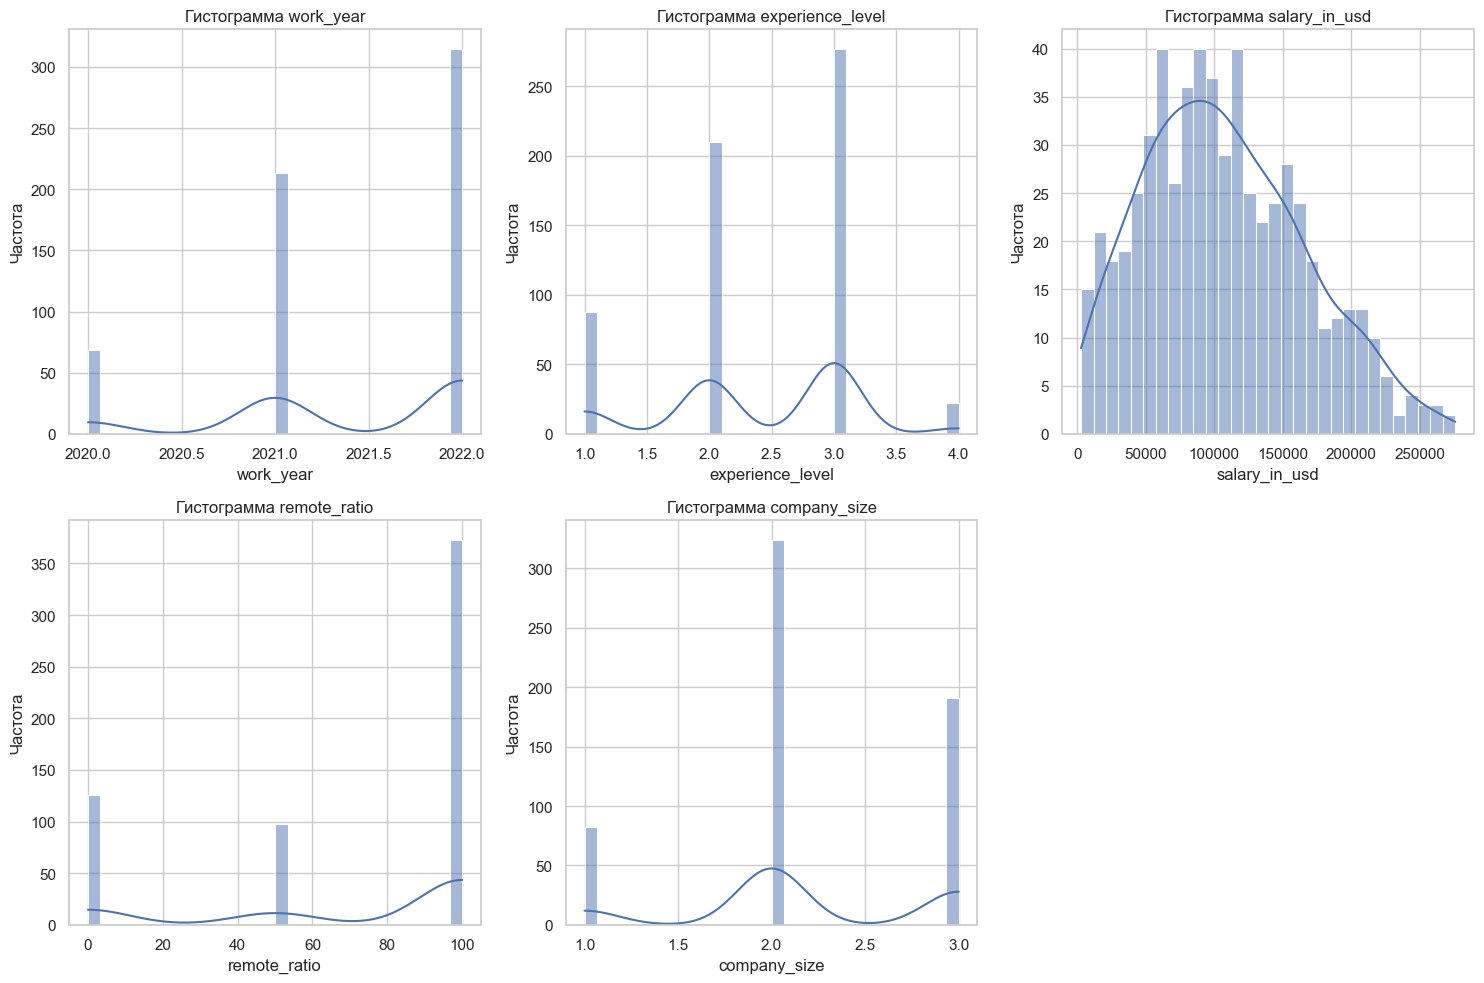

In [150]:
# Настройка стиля Seaborn
sns.set(style="whitegrid")

# Определение числовых признаков
numeric_columns = ['work_year', 'experience_level', 'salary_in_usd', 'remote_ratio', 'company_size']

# Построение гистограмм для числовых признаков
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Гистограмма {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()


### В порядке графиков:
1. Наибольшее количество наблюдений собрано за 2021 и 2022 года
2. Распределение опыта в наблюдениях Senior-level/Expert (~280), Mid-level (~210), Entry-level (~80) и меньше всего у Executive-level (~25)
3. Гистограмма распределения заработной платы похожа на обрезанное нормальное распределение в котором отсутствует 1-й квантиль. Зарплата не может начинаться с нуля.
4. ~380 позиций позволяют полностью работать удаленно, ~100 - частично работать удаленно, ~125 работа в офисе.
5. ~330 компаний имеют средний размер, чуть менее 200 компаний являются крупными и ~80 имеют мальенький размер.

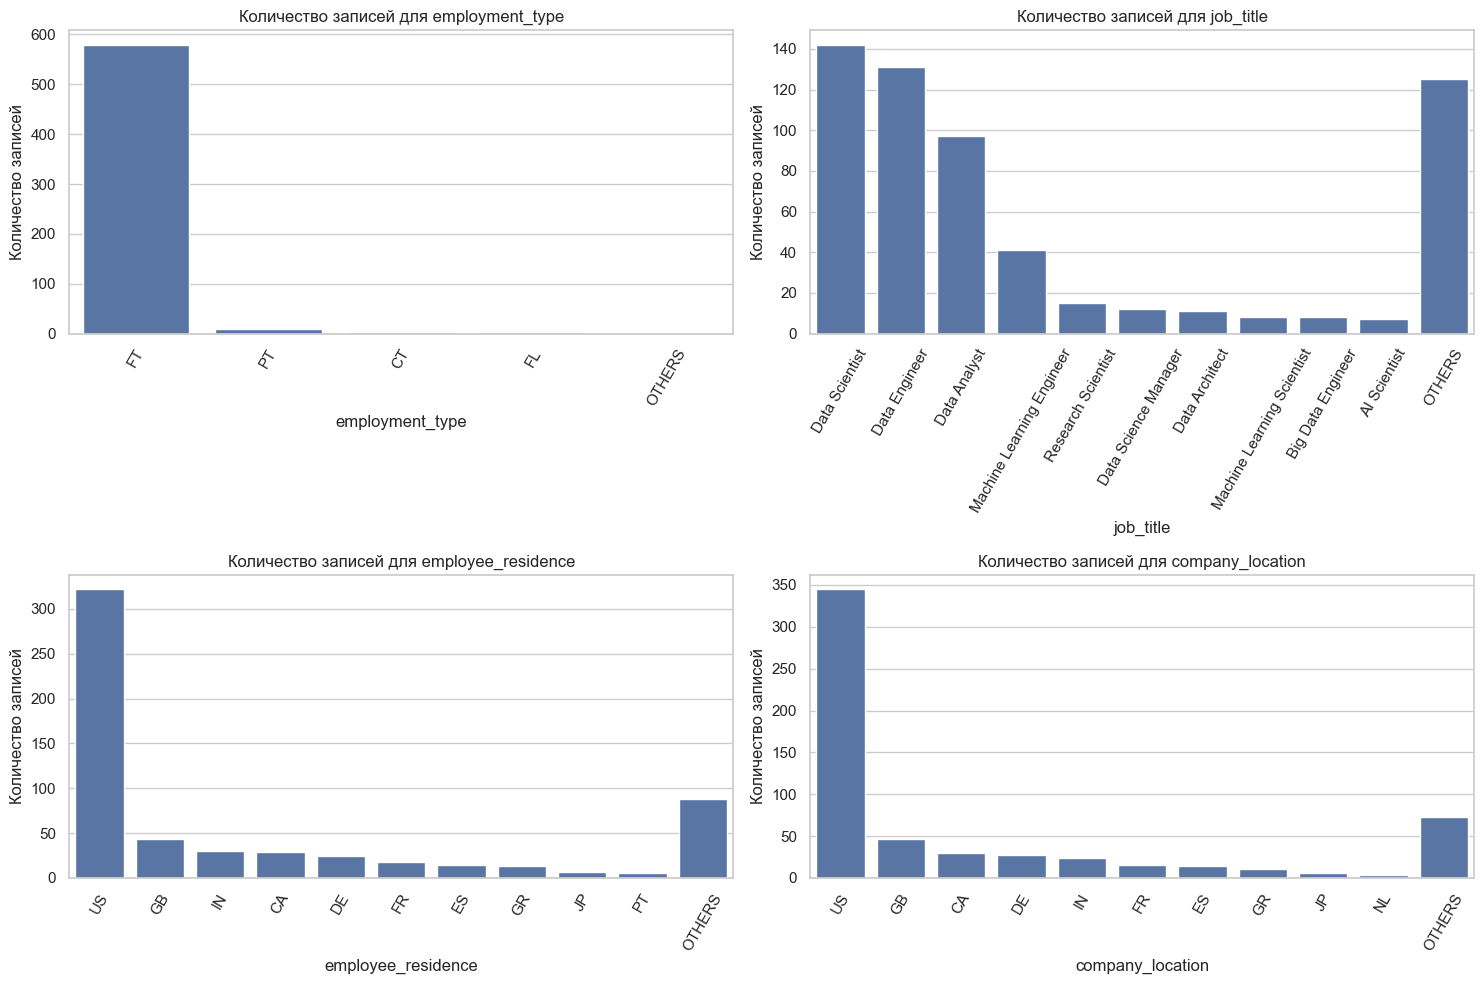

In [151]:
# Определение категориальных признаков
categorical_columns = ['employment_type', 'job_title', 'employee_residence', 'company_location']

# Обработка 'job_title'
# Подсчет количества записей для каждой профессии в 'job_title'
job_counts = data['job_title'].value_counts()
top_jobs = job_counts.nlargest(10).index
data['job_title'] = data['job_title'].where(data['job_title'].isin(top_jobs), 'OTHERS')

# Обработка 'employee_residence'
# Подсчет количества записей для каждой страны проживания
residence_counts = data['employee_residence'].value_counts()
top_residences = residence_counts.nlargest(10).index
data['employee_residence'] = data['employee_residence'].where(data['employee_residence'].isin(top_residences), 'OTHERS')

# Обработка 'company_location'
# Подсчет количества записей для каждой страны компании
company_counts = data['company_location'].value_counts()
top_companies = company_counts.nlargest(10).index
data['company_location'] = data['company_location'].where(data['company_location'].isin(top_companies), 'OTHERS')

# Построение графиков для категориальных признаков
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i + 1)
    # Получение порядка значений с 'OTHERS' в конце
    order = data[col].value_counts().index.tolist()
    if 'OTHERS' in order:
        order.remove('OTHERS')
    order.append('OTHERS')
    
    sns.countplot(data=data, x=col, order=order)
    plt.title(f'Количество записей для {col}')
    plt.xlabel(col)
    plt.ylabel('Количество записей')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()




### В порядке графиков:
1. Подавляющую часть данных занимают позиции FT - полная занятость. Остальные варианты занятости имеют размер погрешности. Следует задуматься над тем, чтобы оставить для модели только FT.
2. Более 140 позиций у Data Scientist, ~130 - Data Engineer, Data Analyst - ~95, 40 - Machine Learning Engineer, далее количество представителей професий идет по ниспадающей.
3. и 4. Больше всего сотрудников находится US, как и подавляющее количество компаний находится там же. Следует проверить эти данные на корреляцию и при необходимости удалить один из признаков, дабы не вредить модели.

In [152]:
# Проверим на сколько сильно коррелируют признаки
# Построение таблицы сопряженности
contingency_table = pd.crosstab(data['company_location'], data['employee_residence'])

# Вычисление хи-квадрат статистики
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Вычисление Cramér's V
n = contingency_table.sum().sum()  # Общее количество записей
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.8499


Наблюдается сильная корреляция. Один из признаков следует удалить. Удалять будем 'employee_residence', так как расположение компании, как платильщика зарплаты для нас более информативно.

In [153]:
# Удаление признака employee_residence
data = data.drop(columns=['employee_residence'])

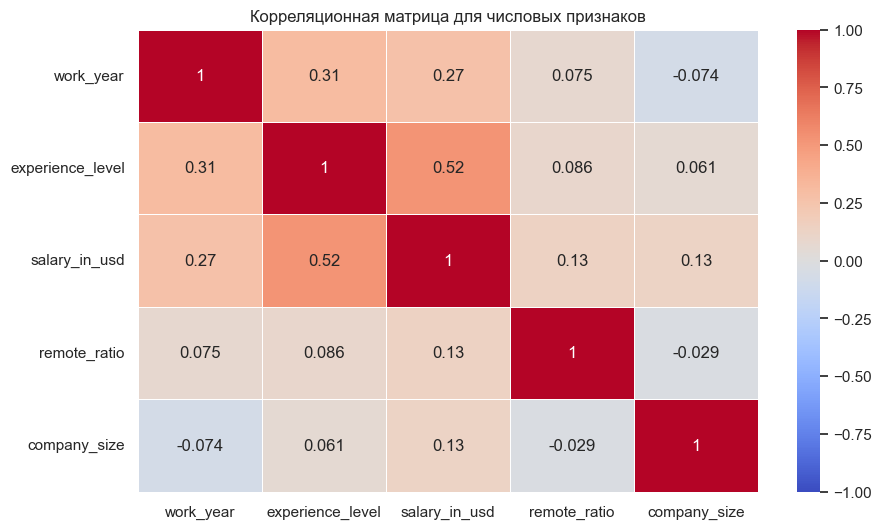

In [154]:
# Выбираем числовые признаки
numeric_columns = ['work_year', 'experience_level', 'salary_in_usd', 'remote_ratio', 'company_size']

# Построение корреляционной матрицы
correlation_matrix = data[numeric_columns].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Корреляционная матрица для числовых признаков')
plt.show()


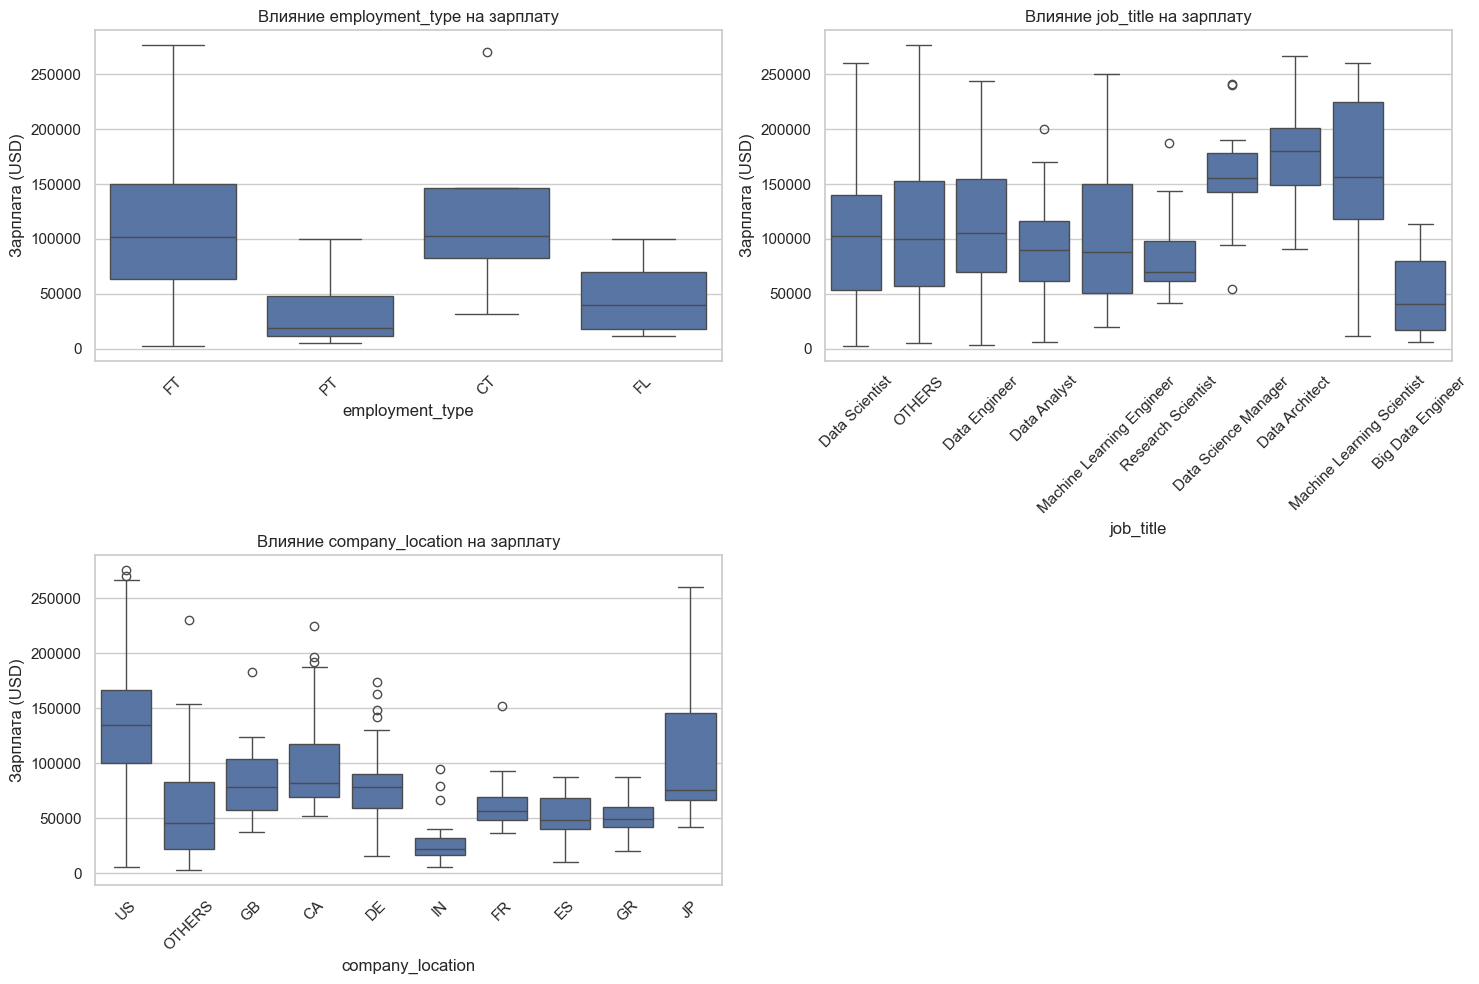

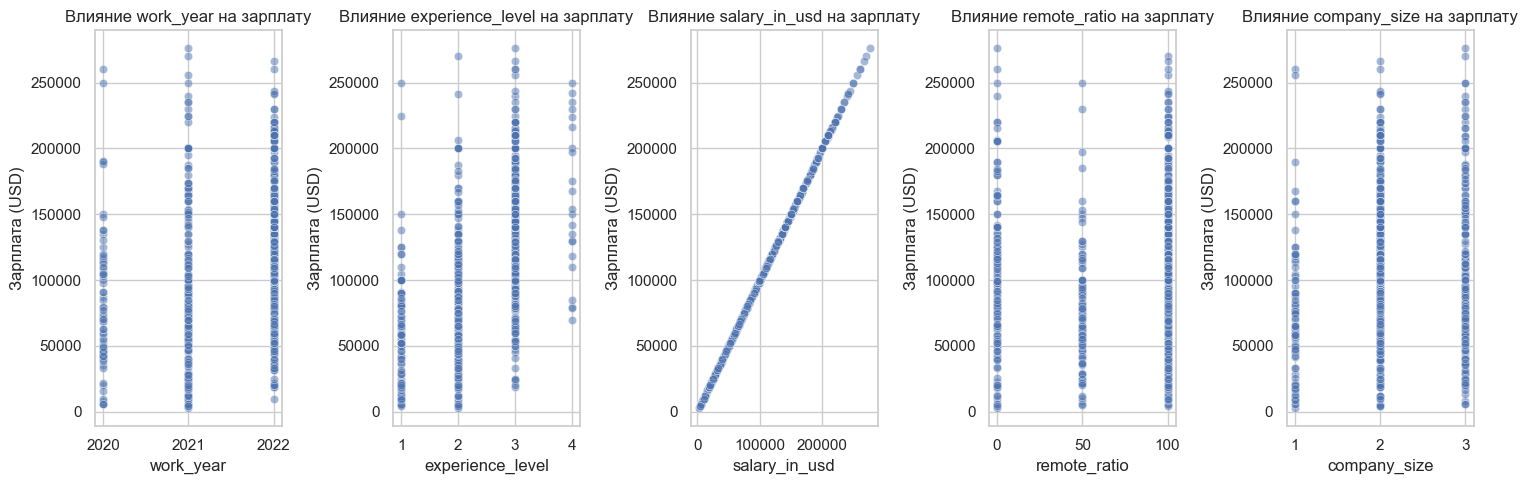

In [155]:
# Обновленный список категориальных признаков (без employee_residence)
categorical_columns = ['employment_type', 'job_title', 'company_location']

# Влияние категориальных признаков на зарплату 
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i + 1)

    # Подсчет количества записей для текущего признака
    counts = data[col].value_counts()
    top_values = counts.nlargest(10).index  # Топ-10 значений

    # Замена остальных значений на 'OTHERS'
    data[col] = data[col].where(data[col].isin(top_values), 'OTHERS')

    # Построение боксплота
    sns.boxplot(data=data, x=col, y='salary_in_usd', order=data[col].value_counts().index)
    plt.title(f'Влияние {col} на зарплату')
    plt.xlabel(col)
    plt.ylabel('Зарплата (USD)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Влияние числовых признаков на зарплату
plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_columns):
    plt.subplot(1, 5, i + 1)
    sns.scatterplot(data=data, x=col, y='salary_in_usd', alpha=0.5)
    plt.title(f'Влияние {col} на зарплату')
    plt.xlabel(col)
    plt.ylabel('Зарплата (USD)')

plt.tight_layout()
plt.show()
